# Create JSON with python

In [1]:
import json

In [2]:
datasetC = [
   {
       "user": {
           "id": 1,
           "name": "agus",
           "email": "agus@example.com"
       },
       "txs": [
           {
               "id": 1,
               "tx_date": "2020-01-01",
               "tx_amount": 10,
               "tx_type": "buy"
           },
           {
               "id": 3,
               "tx_date": "2020-02-01",
               "tx_amount": 10,
               "tx_type": "buy"
           },
           {
               "id": 5,
               "tx_date": "2020-03-01",
               "tx_amount": 20,
               "tx_type": "sell"
           }
       ]
   },
   {
       "user": {
           "id": 2,
           "name": "asep",
           "email": "asep@example.com"
       },
       "txs": [
           {
               "id": 2,
               "tx_date": "2020-01-01",
               "tx_amount": 10,
               "tx_type": "sell"
           },
           {
               "id": 4,
               "tx_date": "2020-02-01",
               "tx_amount": 10,
               "tx_type": "sell"
           },
           {
               "id": 6,
               "tx_date": "2020-03-01",
               "tx_amount": 20,
               "tx_type": "buy"
           }
       ]
   }
]


In [3]:
datasetCjson = json.dumps(datasetC, indent=4)

In [4]:
print(datasetCjson)

[
    {
        "user": {
            "id": 1,
            "name": "agus",
            "email": "agus@example.com"
        },
        "txs": [
            {
                "id": 1,
                "tx_date": "2020-01-01",
                "tx_amount": 10,
                "tx_type": "buy"
            },
            {
                "id": 3,
                "tx_date": "2020-02-01",
                "tx_amount": 10,
                "tx_type": "buy"
            },
            {
                "id": 5,
                "tx_date": "2020-03-01",
                "tx_amount": 20,
                "tx_type": "sell"
            }
        ]
    },
    {
        "user": {
            "id": 2,
            "name": "asep",
            "email": "asep@example.com"
        },
        "txs": [
            {
                "id": 2,
                "tx_date": "2020-01-01",
                "tx_amount": 10,
                "tx_type": "sell"
            },
            {
                "id": 4,
               

## Convert to JSON

In [5]:
with open('datasetC.json','w') as file:
    json.dump(datasetC, file, indent=4)

Until this step, we already succeed to create dataset C with JSON extension using python. The name of JSON file would be **datasetC.json**

# Load JSON File and Convert to Dataframe

In [6]:
import pandas as pd

In [7]:
with open('datasetC.json','r') as file:
    data = json.load(file)

In [8]:
print(data)

[{'user': {'id': 1, 'name': 'agus', 'email': 'agus@example.com'}, 'txs': [{'id': 1, 'tx_date': '2020-01-01', 'tx_amount': 10, 'tx_type': 'buy'}, {'id': 3, 'tx_date': '2020-02-01', 'tx_amount': 10, 'tx_type': 'buy'}, {'id': 5, 'tx_date': '2020-03-01', 'tx_amount': 20, 'tx_type': 'sell'}]}, {'user': {'id': 2, 'name': 'asep', 'email': 'asep@example.com'}, 'txs': [{'id': 2, 'tx_date': '2020-01-01', 'tx_amount': 10, 'tx_type': 'sell'}, {'id': 4, 'tx_date': '2020-02-01', 'tx_amount': 10, 'tx_type': 'sell'}, {'id': 6, 'tx_date': '2020-03-01', 'tx_amount': 20, 'tx_type': 'buy'}]}]


In [9]:
DatasetC_1 = pd.json_normalize(data, record_path='txs',meta='user')
DatasetC_1

,id,tx_date,tx_amount,tx_type,user
0,1,2020-01-01,10,buy,"{'id': 1, 'name': 'agus', 'email': 'agus@examp..."
1,3,2020-02-01,10,buy,"{'id': 1, 'name': 'agus', 'email': 'agus@examp..."
2,5,2020-03-01,20,sell,"{'id': 1, 'name': 'agus', 'email': 'agus@examp..."
3,2,2020-01-01,10,sell,"{'id': 2, 'name': 'asep', 'email': 'asep@examp..."
4,4,2020-02-01,10,sell,"{'id': 2, 'name': 'asep', 'email': 'asep@examp..."
5,6,2020-03-01,20,buy,"{'id': 2, 'name': 'asep', 'email': 'asep@examp..."


In [10]:
DatasetC_2 = DatasetC_1['user'].apply(pd.Series)
DatasetC_2

,id,name,email
0,1,agus,agus@example.com
1,1,agus,agus@example.com
2,1,agus,agus@example.com
3,2,asep,asep@example.com
4,2,asep,asep@example.com
5,2,asep,asep@example.com


# Answer to Create CSV_1 df

Expected Dataframe :

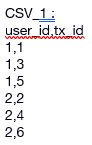

In [11]:
#copy dataframe from DatasetC_1 and assign tuh new variable named as dfTemp1
dfTemp1 = DatasetC_1.copy()

#drop all column, except id column
dfTemp1 = dfTemp1.drop(['user','tx_type','tx_amount','tx_date'], axis=1)

#rename column id to tx_id
dfTemp1.columns = ['tx_id']

#display dfTemp1
dfTemp1

,tx_id
0,1
1,3
2,5
3,2
4,4
5,6


In [12]:
#copy dataframe from DatasetC_2 and assign tuh new variable named as dfTemp2
dfTemp2 = DatasetC_2.copy()

#drop column user
dfTemp2 = dfTemp2.drop(['name','email'], axis=1)

#rename column id to tx_id
dfTemp2.columns = ['user_id']

#display dfTemp2
dfTemp2

,user_id
0,1
1,1
2,1
3,2
4,2
5,2


In [13]:
#Concatenate dfTemp1 and dfTemp2 to one dataframe called dfCSV_1
dfCSV_1 = pd.concat([dfTemp2, dfTemp1], axis=1)
dfCSV_1

,user_id,tx_id
0,1,1
1,1,3
2,1,5
3,2,2
4,2,4
5,2,6


In [14]:
#Convert Dataframe to CSV
dfCSV_1.to_csv('CSV_1.csv', index=False)
print('Convert Success')

Convert Success


In [15]:
#load to recheck dataset in CSV_1
dfForCSV_1 = pd.read_csv('CSV_1.csv')
dfForCSV_1

,user_id,tx_id
0,1,1
1,1,3
2,1,5
3,2,2
4,2,4
5,2,6


# Answer to Create CSV_2 df

Expected CSV :


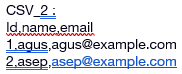

In [16]:
#Copy dataset from DatasetC_2 and assign to new dataframe named as dfTemp3
dfTemp3 = DatasetC_2.copy()

#Delete duplicate data to convert to be expected csv
dfCSV_2 = dfTemp3.drop_duplicates()

#reset_index
dfCSV_2 = dfCSV_2.reset_index(drop=True)

#show final dataframe
dfCSV_2

,id,name,email
0,1,agus,agus@example.com
1,2,asep,asep@example.com


In [17]:
#Convert Dataframe to CSV
dfCSV_2.to_csv('CSV_2.csv', index=False)
print('Convert Success')

Convert Success


In [18]:
#load to recheck dataset in CSV_1
dfForCSV_2 = pd.read_csv('CSV_2.csv')
dfForCSV_2

,id,name,email
0,1,agus,agus@example.com
1,2,asep,asep@example.com


# Answer to Create CSV_3 df

Expected CSV :

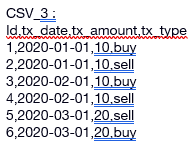

In [19]:
#Copy dataset from DatasetC_1 and assign to new dataframe named as dfTemp4
dfTemp4 = DatasetC_1.copy()

#drop user column
dfTemp4 = dfTemp4.drop('user', axis=1)

#order by id column
dfTemp4 = dfTemp4.sort_values(by=['id'])

#show dfTemp4
dfTemp4


,id,tx_date,tx_amount,tx_type
0,1,2020-01-01,10,buy
3,2,2020-01-01,10,sell
1,3,2020-02-01,10,buy
4,4,2020-02-01,10,sell
2,5,2020-03-01,20,sell
5,6,2020-03-01,20,buy


In [20]:
#Convert Dataframe to CSV
dfTemp4.to_csv('CSV_3.csv', index=False)
print('Convert Success')

Convert Success


In [21]:
#load to recheck dataset in CSV_1
dfForCSV_3 = pd.read_csv('CSV_3.csv')
dfForCSV_3

,id,tx_date,tx_amount,tx_type
0,1,2020-01-01,10,buy
1,2,2020-01-01,10,sell
2,3,2020-02-01,10,buy
3,4,2020-02-01,10,sell
4,5,2020-03-01,20,sell
5,6,2020-03-01,20,buy
